## Importing Libraries

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
##Getting Data
uk= pd.read_excel('UK Bank Customers.xlsx')
uk.head()

,Customer ID,Name,Surname,Gender,Age,Province,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [3]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         4014 non-null   int64  
 1   Name                4014 non-null   object 
 2   Surname             4014 non-null   object 
 3   Gender              4014 non-null   object 
 4   Age                 4014 non-null   int64  
 5   Province            4014 non-null   object 
 6   Job Classification  4014 non-null   object 
 7   Date Joined         4014 non-null   object 
 8   Balance             4014 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.4+ KB


In [5]:
uk[['Balance','Age']].describe().round(2)
#we see average of age is 38.61 that's means child account

,Balance,Age
count,4014.00,4014.00
mean,39766.45,38.61
std,29859.49,9.82
min,11.52,15.00
25%,16115.37,31.00
50%,33567.33,37.00
75%,57533.93,45.00
max,183467.70,64.00


## Preprocessing


In [6]:
uk.isnull().sum() 
#we don't have any missing values 

Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Province              0
Job Classification    0
Date Joined           0
Balance               0
dtype: int64

In [8]:
uk.duplicated().sum()
#also any duplicated values we are happy now 

0

In [10]:
uk['Age'].unique()

array([21, 34, 46, 32, 38, 30, 48, 33, 42, 40, 39, 24, 36, 31, 37, 58, 41,
       52, 55, 50, 25, 26, 35, 59, 27, 49, 22, 53, 47, 19, 29, 44, 43, 61,
       45, 51, 23, 20, 28, 56, 57, 54, 63, 18, 17, 62, 60, 64, 15],
      dtype=int64)

In [11]:
uk['Age'].nunique()

49

In [12]:
uk['Age'].value_counts()

34    185
36    183
33    167
37    166
31    163
35    163
32    161
38    159
29    139
42    133
40    132
39    126
30    125
41    125
43    121
45    117
44    105
28    104
27     96
47     93
46     91
48     84
52     77
26     76
51     75
25     67
49     67
53     66
50     65
24     58
54     49
55     47
23     46
58     45
56     42
59     34
57     34
22     31
61     31
18     30
60     29
21     27
20     20
19     19
64     15
63     11
62     10
17      4
15      1
Name: Age, dtype: int64

In [13]:
uk['Province'].unique()
#we have 4 province here 

array(['England', 'Northern Ireland', 'Wales', 'Scotland'], dtype=object)

In [14]:
uk['Province'].nunique()

4

In [15]:
uk['Province'].value_counts()
#most province presented here are england and scotich

England             2159
Scotland            1124
Wales                520
Northern Ireland     211
Name: Province, dtype: int64

In [16]:
uk['Job Classification'].unique()

array(['White Collar', 'Blue Collar', 'Other'], dtype=object)

In [17]:
uk['Job Classification'].nunique()

3

In [18]:
uk['Job Classification'].value_counts()
#white collar grades are diominate 

White Collar    1955
Blue Collar     1049
Other           1010
Name: Job Classification, dtype: int64

In [ ]:
#convert date joined to date 

In [19]:
import datetime
uk['Date Joined']=pd.to_datetime(uk['Date Joined'])
uk['Date Joined'].head()

0   2015-01-05
1   2015-01-06
2   2015-01-07
3   2015-01-08
4   2015-01-09
Name: Date Joined, dtype: datetime64[ns]

In [21]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer ID         4014 non-null   int64         
 1   Name                4014 non-null   object        
 2   Surname             4014 non-null   object        
 3   Gender              4014 non-null   object        
 4   Age                 4014 non-null   int64         
 5   Province            4014 non-null   object        
 6   Job Classification  4014 non-null   object        
 7   Date Joined         4014 non-null   datetime64[ns]
 8   Balance             4014 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 282.4+ KB


## EDA

In [32]:
uk.sample(10)

,Customer ID,Name,Surname,Gender,Age,Province,Job Classification,Date Joined,Balance
2770,100002771,Ryan,Clarkson,Male,27,England,White Collar,2015-10-24,34618.10
490,200000491,Piers,Jones,Male,46,Scotland,Blue Collar,2015-05-14,14557.62
2982,100002983,Amelia,Hill,Female,24,England,Blue Collar,2015-11-02,55477.57
3686,100003687,Ruth,Avery,Female,33,England,White Collar,2015-12-13,60116.40
3022,100003023,Jonathan,Oliver,Male,37,England,White Collar,2015-11-05,77501.35
2557,100002558,Matt,Miller,Male,30,England,White Collar,2015-10-11,23025.61
3649,200003650,Thomas,Fraser,Male,51,Scotland,Blue Collar,2015-12-10,5018.31
587,200000588,Sean,Dyer,Male,46,Scotland,Blue Collar,2015-05-19,26094.73
1251,200001252,Alan,Campbell,Male,34,Scotland,Blue Collar,2015-07-17,10309.36
1188,100001189,Madeleine,Ross,Female,32,England,Other,2015-07-13,76207.19


## what is the average of ages ?

In [33]:
uk[['Age']].describe().round(2)
#average of 38.61

,Age
count,4014.00
mean,38.61
std,9.82
min,15.00
25%,31.00
50%,37.00
75%,45.00
max,64.00


## How much sum of balance we have ?

In [34]:
uk['Balance'].sum()

159622523.37

## Who is the most customer has the heighest balance and where he belongs ?is he male ?how old is he ? 

In [48]:
customers= uk.groupby(by=['Name','Surname','Gender','Age','Province'], as_index=False)['Balance'].sum()

In [49]:
customers.sort_values(by='Balance', ascending=False).head()

,Name,Surname,Gender,Age,Province,Balance
1132,Dorothy,Jackson,Female,31,England,183467.70
675,Carl,Fraser,Male,35,England,181680.99
917,Connor,North,Male,50,Scotland,172085.48
3435,Sebastian,Arnold,Male,44,England,161517.82
349,Anna,Randall,Female,25,Northern Ireland,149698.12


In [ ]:
#Dorothy Jackson she is 31 from england has the heighst Balance 

 ## who is dominated Male or Female ?

<AxesSubplot: >

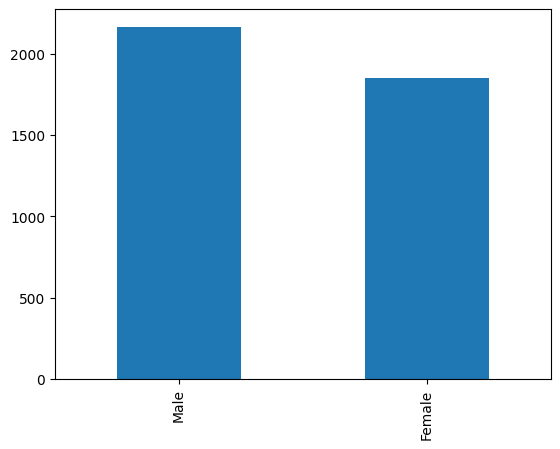

In [45]:
uk['Gender'].value_counts().plot.bar()

In [ ]:
### Male are dominated 

## Bivarite

## how is the distrubution of male and female in our Province ?

<AxesSubplot: xlabel='Province', ylabel='count'>

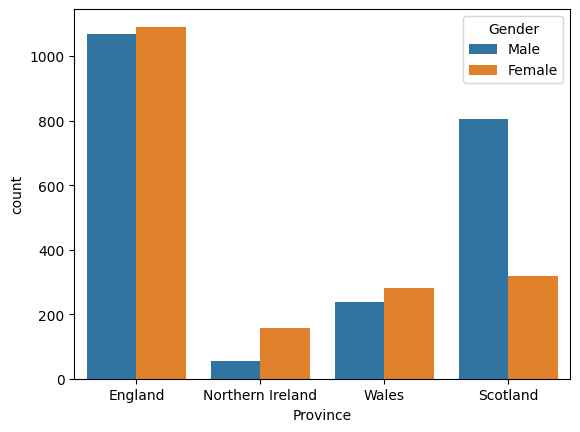

In [57]:
## Plotting Province Against sex
sns.countplot(x = 'Province' , hue ='Gender' , data = uk)

In [ ]:
#the distrubution of male by province 
#scotland are full with males

## which job has the heighst balance ?

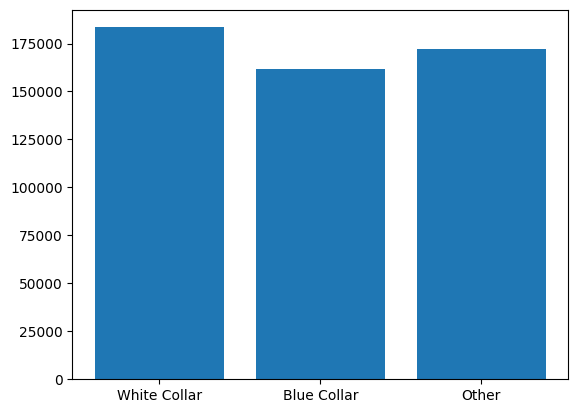

In [65]:
plt.bar(uk['Job Classification'],uk['Balance'])
plt.show()


In [ ]:
#White Collar are heighst balance grade

C:\Users\Pc\AppData\Local\Temp\ipykernel_14064\3409382766.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  uk.hist(ax=ax)


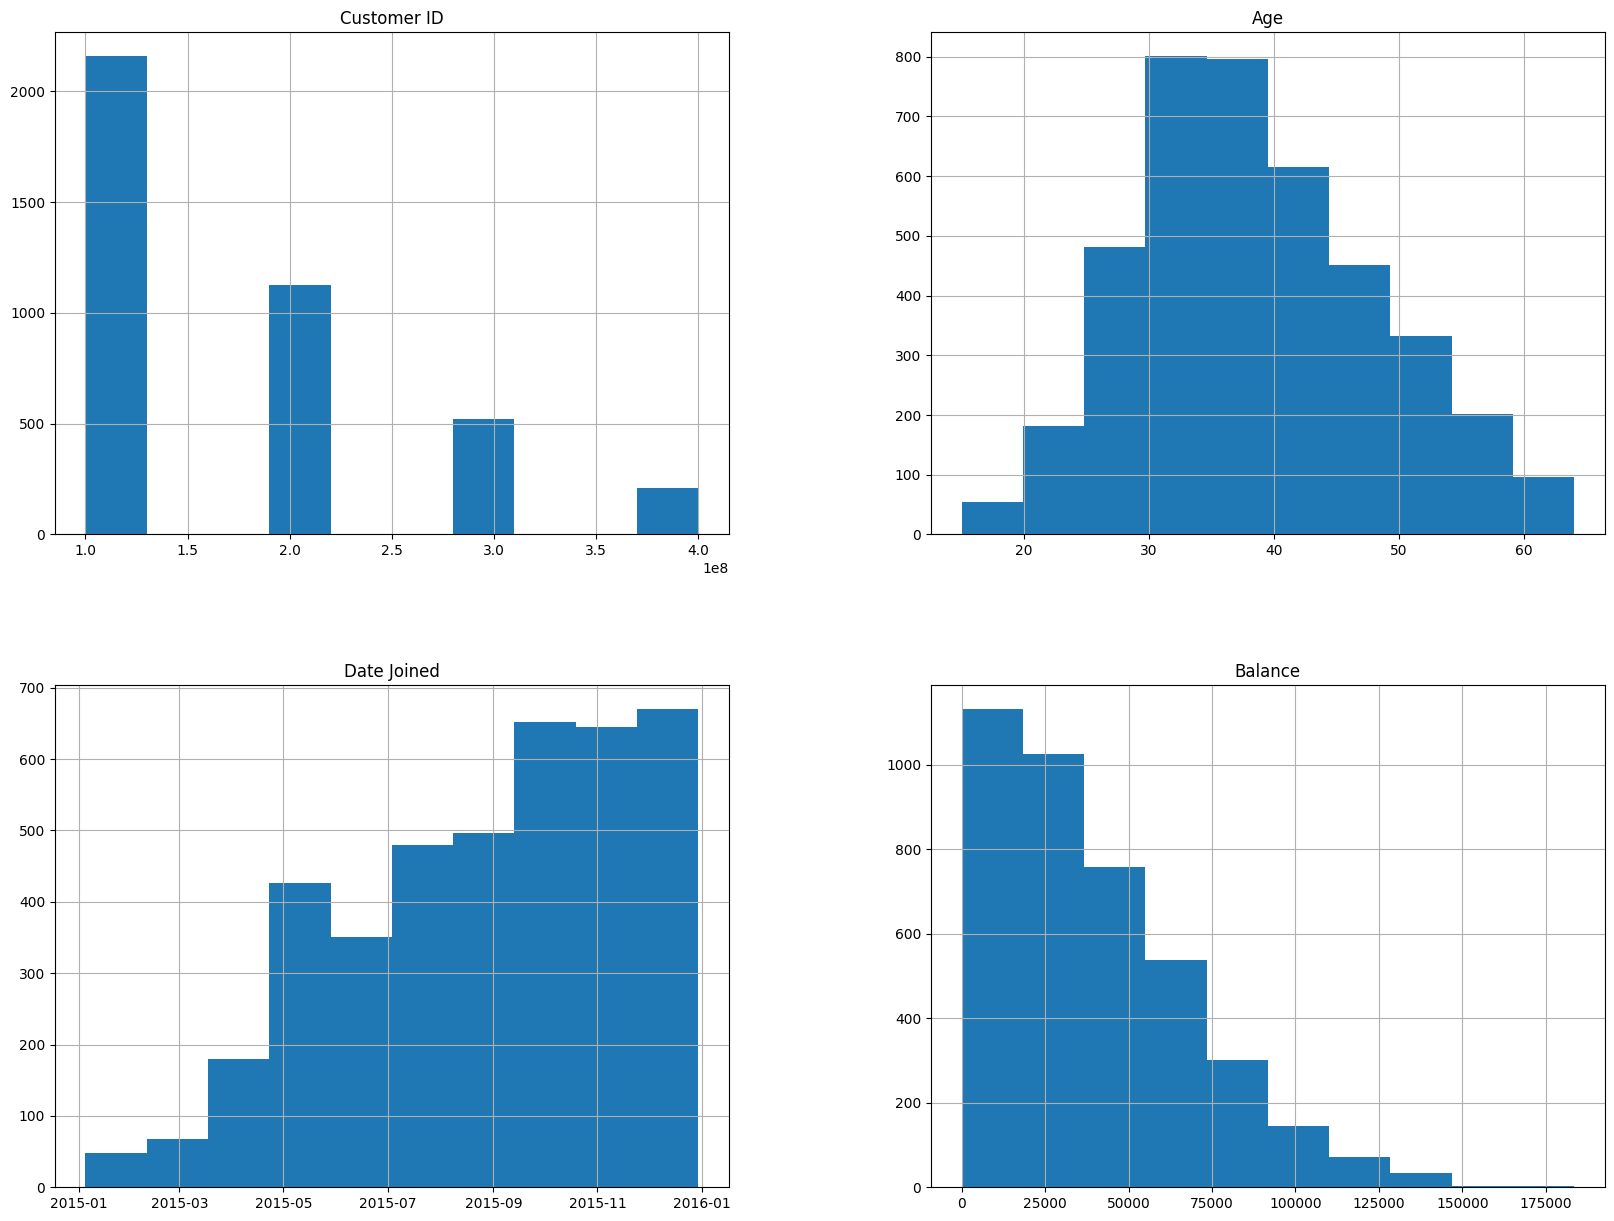

In [68]:
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
uk.hist(ax=ax)
plt.show()

## coorelation

In [70]:
uk.corr()

C:\Users\Pc\AppData\Local\Temp\ipykernel_14064\763316801.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  uk.corr()


,Customer ID,Age,Balance
Customer ID,1.000000,0.081691,0.021428
Age,0.081691,1.000000,0.009359
Balance,0.021428,0.009359,1.000000


C:\Users\Pc\AppData\Local\Temp\ipykernel_14064\370579981.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(uk.iloc[:,0:15].corr(), annot=True,fmt=".0%")


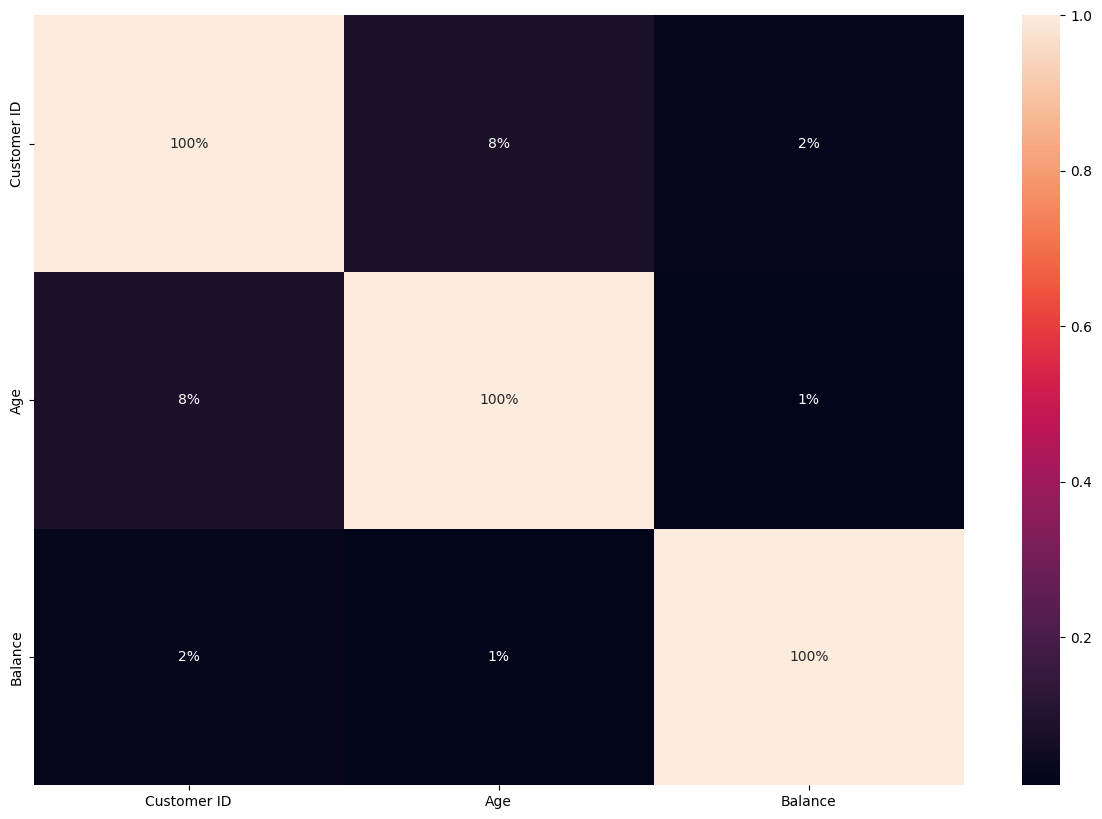

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(uk.iloc[:,0:15].corr(), annot=True,fmt=".0%")
plt.show()